<a href="https://colab.research.google.com/github/yashsinghkvojhar/yashsinghkvojhar/blob/main/E_commerce_website.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Background:**
In the dynamic landscape of e-commerce, understanding user behavior and website performance is crucial for optimizing conversions and maximizing revenue. The provided dataset offers a comprehensive view of user interactions on an e-commerce website, encompassing various dimensions such as page visits, session durations, traffic sources, and purchase behavior.

**Objective:**
The objective of this project is to leverage the dataset to analyze website statistics and derive actionable insights aimed at enhancing the e-commerce platform's performance and maximizing revenue generation. By examining user engagement metrics, traffic patterns, and transactional data, the goal is to identify areas of improvement and formulate strategic recommendations for optimization.


In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
df=pd.read_csv('shopping.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [88]:
df.shape

(12330, 18)

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [90]:
# Month, Operating Systems, Browser, Traffic Type change them to object type
df['Month']=df['Month'].astype('object')
df['OperatingSystems']=df['OperatingSystems'].astype('object')
df['Browser']=df['Browser'].astype('object')
df['TrafficType']=df['TrafficType'].astype('object')


In [91]:
df.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157214,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


**Administrative Pages (Administrative):**

Users, on average, visit about 2.32 administrative pages per session.
There is variability with some sessions having up to 27 administrative page visits.
This suggests users engage moderately with administrative content during their visits to the website.

**Duration on Administrative Pages (Administrative_Duration):**

The average time spent on administrative pages is 80.82 seconds per session.
There is significant variation in session durations, ranging from 0 to over 3,398 seconds.
Users spend considerable time interacting with administrative content, indicating potential engagement with detailed information or tasks.

**Informational Pages (Informational):**

On average, users view approximately 0.50 informational pages per session.
Most sessions do not involve informational page views, although some sessions have up to 24 views.
Informational content seems less frequently accessed compared to administrative and product-related content.

**Duration on Informational Pages (Informational_Duration):**

The average time spent on informational pages is 34.47 seconds per session.
Similar to page views, there is a wide range in durations, from 0 to over 2,549 seconds.
Users spend relatively less time on informational pages compared to other page categories.

**Product-Related Pages (ProductRelated):**

Users, on average, view about 31.73 product-related pages per session.
The distribution shows variability, with some sessions involving up to 705 product-related page views.
Product-related content appears to be a significant focus of user interaction on the website.

**Duration on Product-Related Pages (ProductRelated_Duration):**

The average time spent on product-related pages is 1,194.75 seconds per session.
There is a wide range of session durations, from 0 to over 63,973 seconds.
Users spend substantial time engaging with product-related content, indicating strong interest and potential for conversions.

**Bounce Rates (BounceRates) and Exit Rates (ExitRates):**

Bounce rate (average of 2.22%) and exit rate (average of 4.31%) suggest relatively low rates of immediate exits from the website.
Understanding these rates can help identify pages or stages where users are more likely to leave without further interaction, influencing optimization strategies.

**Page Values (PageValues):**

The average page value is 5.89, indicating the average contribution of each page view to revenue generation.
This metric helps quantify the importance of different pages in terms of their impact on overall revenue.

**Special Days (SpecialDay) and Region (Region):**

On average, sessions are marginally influenced by special days (average of 0.06) and occur predominantly in Region 3 (average of 3.15).
These factors can influence user behavior and purchasing decisions, requiring tailored marketing strategies and regional targeting.

In [92]:
df.describe(include='object').T

,count,unique,top,freq
Month,12330,10,May,3364
OperatingSystems,12330,8,2,6601
Browser,12330,13,2,7961
TrafficType,12330,20,2,3913
VisitorType,12330,3,Returning_Visitor,10551


**Month:**

Top Month: May
Interpretation: May has the highest frequency of user interactions. Understanding peak activity months can inform seasonal marketing campaigns and resource allocation.

**Operating Systems:**

Top OS: Operating System 2
Interpretation: OS 2 is the most commonly used among users. This insight guides website optimization efforts to ensure compatibility and performance for the predominant operating system.

**Browser:**

Top Browser: Browser 2
Interpretation: Browser 2 is the most frequently used browser. Optimizing website functionality and design for Browser 2 can enhance user experience and reduce compatibility issues.

**Traffic Type:**

Top Traffic Type: Traffic Type 2
Interpretation: Traffic Type 2 drives the highest volume of visits. Tailoring marketing strategies to capitalize on the most effective traffic sources can boost overall website traffic and engagement.

**Visitor Type:**

Top Visitor Type: Returning_Visitor
Interpretation: Returning visitors are the predominant visitor type. Focusing on retention strategies and personalized experiences for returning visitors can foster loyalty and increase repeat visits.

In [93]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

No null values in the fields

In [94]:
# Round duration columns to 2 decimal places
df['Administrative_Duration'] = df['Administrative_Duration'].round(2)
df['Informational_Duration'] = df['Informational_Duration'].round(2)
df['ProductRelated_Duration'] = df['ProductRelated_Duration'].round(2)

# Change months to numerical values
months_dict = {'Feb': 2, 'Mar': 3, 'May': 5, 'Oct': 10, 'June': 6, 'Jul': 7,
              'Aug': 8, 'Sep': 9, 'Nov': 11, 'Dec': 12, 'Jan': 1, 'Apr': 4}
df['Month'] = df['Month'].map(months_dict)

# Change weekend and revenue to 0 and 1
df['Weekend'] = df['Weekend'].apply(lambda x: 1 if x == True else 0)
df['Revenue'] = df['Revenue'].apply(lambda x: 1 if x == True else 0)

# Display the updated DataFrame
df.head()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.00,0.20,0.20,0.0,0.0,2,1,1,1,1,Returning_Visitor,0,0
1,0,0.0,0,0.0,2,64.00,0.00,0.10,0.0,0.0,2,2,2,1,2,Returning_Visitor,0,0
2,0,0.0,0,0.0,1,0.00,0.20,0.20,0.0,0.0,2,4,1,9,3,Returning_Visitor,0,0
3,0,0.0,0,0.0,2,2.67,0.05,0.14,0.0,0.0,2,3,2,2,4,Returning_Visitor,0,0
4,0,0.0,0,0.0,10,627.50,0.02,0.05,0.0,0.0,2,3,3,1,4,Returning_Visitor,1,0


In [95]:
# Users visited all three category of pages
df['AllPageCategoriesVisited'] = (df['Administrative_Duration'] > 0) & (df['Informational_Duration'] > 0) & (df['ProductRelated_Duration'] > 0)
df['AllPageCategoriesVisited'] = df['AllPageCategoriesVisited'].astype(int)

In [96]:
#Special Day Flag
df['Special_Day']=df['SpecialDay'].apply(lambda x: 1 if x>0.5 else 0)
df['Special_Day']=df['Special_Day'].astype(int)
# Drop SpecialDay
df.drop('SpecialDay',axis=1,inplace=True)

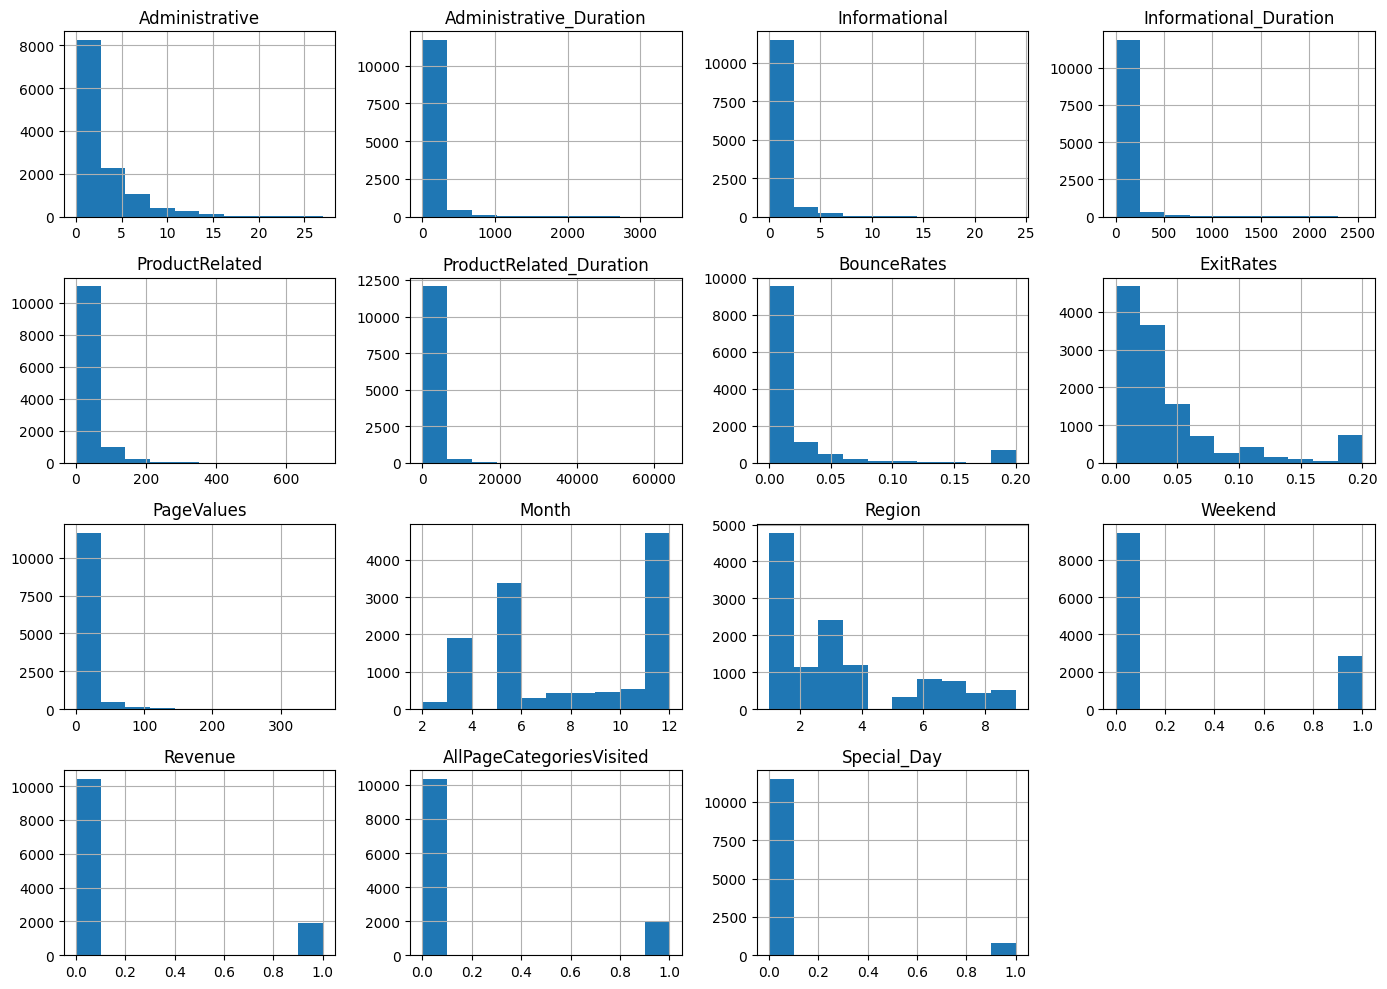

In [97]:
df.hist(figsize=(14,10))
plt.tight_layout()
plt.show()

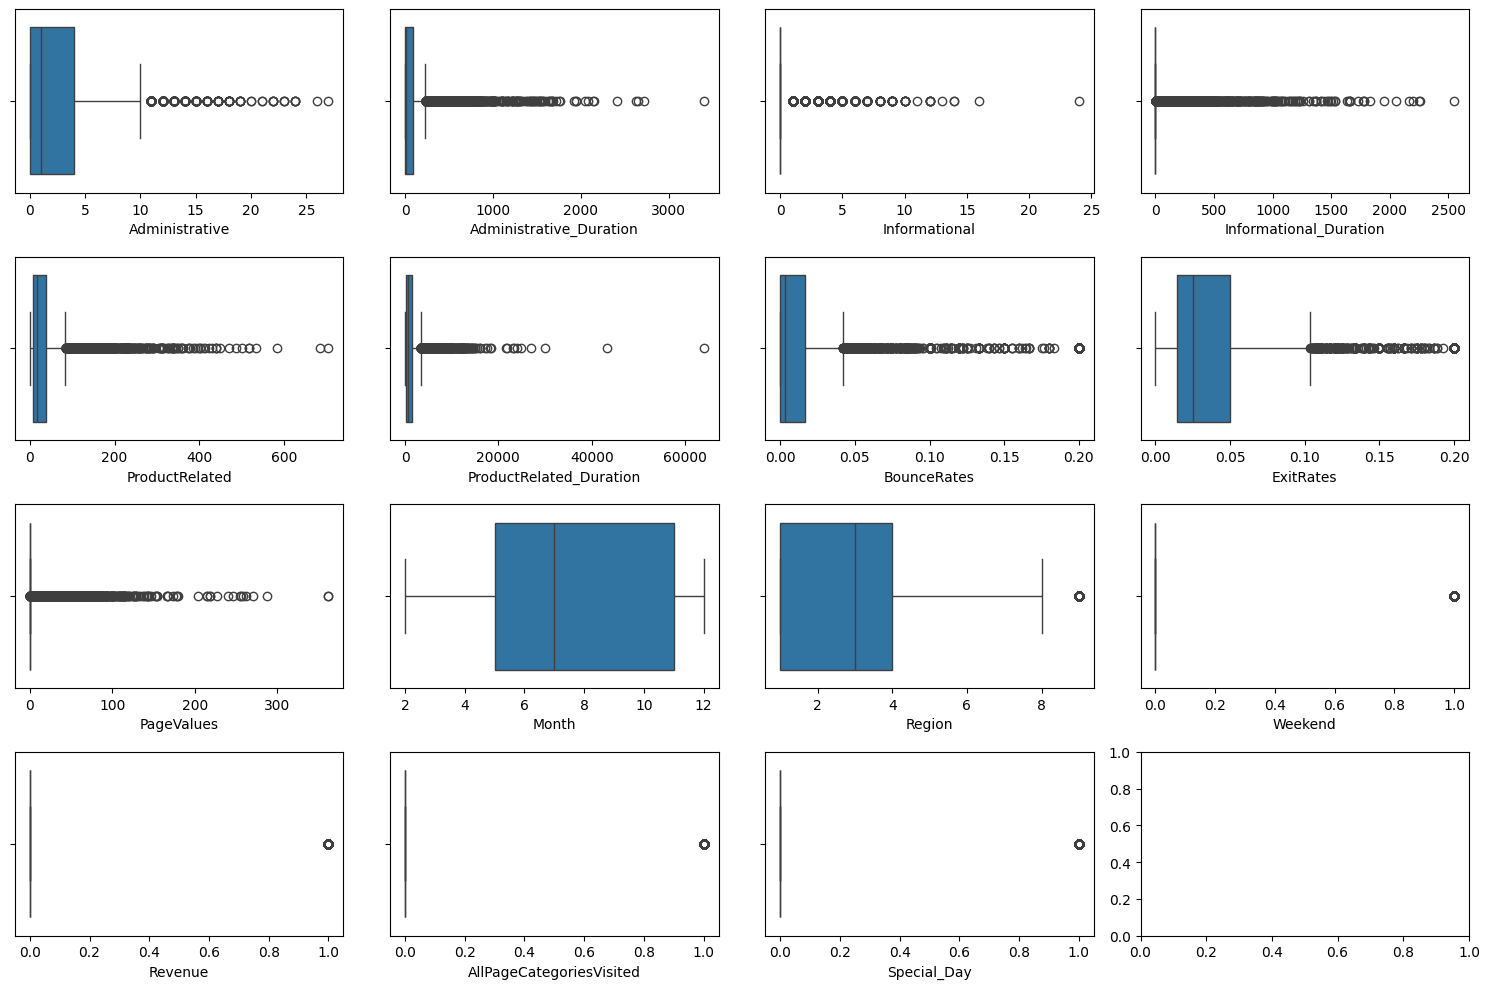

In [98]:
# Outliers detection
num_cols=df.select_dtypes('number').columns
fig,ax=plt.subplots(4,4,figsize=(15,10))
for i,col in enumerate(num_cols):
    sns.boxplot(x=df[col],ax=ax[i//4,i%4])

plt.tight_layout()
plt.show()


In [99]:
# remove boolean and categorical columns from num_cols
num_cols = [col for col in num_cols if col not in ['Weekend', 'Revenue', 'AllPageCategoriesVisited','Special_Day','Browser','PageValues','Informational','Informational_Duration','OperatingSystems']]

In [100]:
def remove_outliers(df, col):
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr
  df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
  return df

for col in num_cols:
  df = remove_outliers(df, col)


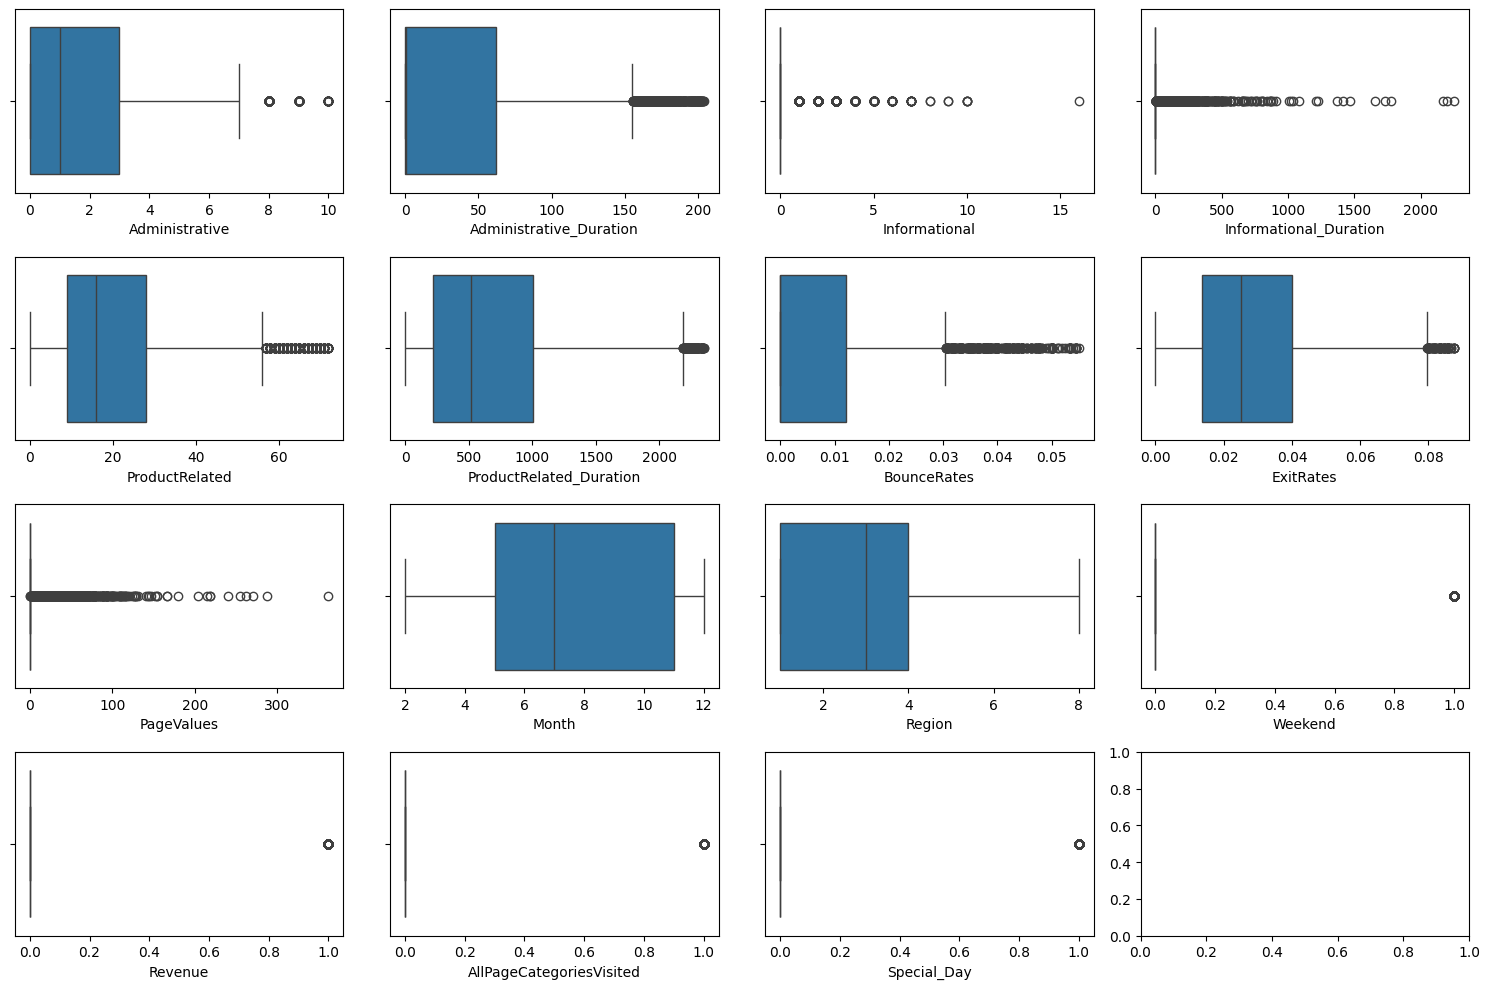

In [101]:
# Outliers detection
num_cols=df.select_dtypes('number').columns
fig,ax=plt.subplots(4,4,figsize=(15,10))
for i,col in enumerate(num_cols):
    sns.boxplot(x=df[col],ax=ax[i//4,i%4])

plt.tight_layout()
plt.show()

In [102]:
df.shape

(7506, 19)

Data is halfed as the other columns contains some form of outliers

In [103]:
# Insights into visitor types and weekend engagement
visitor_types = df['VisitorType'].value_counts()
weekend_engagement = df.groupby('Weekend')['Revenue'].mean()

In [104]:
visitor_types

VisitorType
Returning_Visitor    6178
New_Visitor          1313
Other                  15
Name: count, dtype: int64

Interpretation: Returning visitors significantly outnumber new visitors, indicating a strong base of repeat users. This emphasizes the importance of strategies focused on retaining and engaging returning visitors to maximize loyalty and conversions.

In [105]:
weekend_engagement

Weekend
0    0.145595
1    0.177570
Name: Revenue, dtype: float64

Interpretation: There is a slight increase in visitor activity during weekends compared to weekdays. Understanding this trend can help in adjusting marketing efforts and promotions to capitalize on higher traffic periods, potentially increasing engagement and conversions during weekends.

4. Correlation Analysis

Correlation Matrix:
Calculation of correlation coefficients between numerical features.
Heatmap visualization to identify relationships and multicollinearity.

In [106]:
# Map Visitor type to numerical values
df['VisitorType'] = df['VisitorType'].map({'New_Visitor': 0, 'Returning_Visitor': 1, 'Other': 2})

In [107]:
# Correlation Matrix: Calculation of correlation coefficients between numerical features.
corr_matrix = df.corr()
corr_matrix

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,AllPageCategoriesVisited,Special_Day
Administrative,1.000000,0.780658,0.212690,0.139687,0.231935,0.155456,-0.084337,-0.251345,0.057720,0.034498,-0.022222,-0.021266,0.017977,-0.035785,-0.111297,0.018564,0.075788,0.345731,-0.080311
Administrative_Duration,0.780658,1.000000,0.200700,0.122658,0.182783,0.165319,-0.086937,-0.266903,0.078387,0.042046,-0.019450,-0.030895,0.035564,-0.025054,-0.142464,0.038727,0.077431,0.328966,-0.098669
Informational,0.212690,0.200700,1.000000,0.613558,0.155024,0.160318,-0.001073,-0.077968,0.017985,0.018417,0.001580,-0.030206,-0.003780,-0.032440,0.018683,0.021548,0.037446,0.683328,-0.022730
Informational_Duration,0.139687,0.122658,0.613558,1.000000,0.090027,0.122363,0.009705,-0.047541,0.019423,0.020136,-0.000733,-0.018022,-0.009317,-0.029376,0.020750,0.021581,0.018639,0.423727,-0.011665
ProductRelated,0.231935,0.182783,0.155024,0.090027,1.000000,0.704856,0.010499,-0.293302,0.077193,0.078737,0.016473,0.005199,-0.002260,-0.034725,0.130588,0.020963,0.086134,0.174317,0.029708
ProductRelated_Duration,0.155456,0.165319,0.160318,0.122363,0.704856,1.000000,0.028490,-0.219857,0.112648,0.069262,0.025750,0.001348,0.007905,-0.032979,0.124191,0.006687,0.122397,0.175590,-0.005431
BounceRates,-0.084337,-0.086937,-0.001073,0.009705,0.010499,0.028490,1.000000,0.576549,-0.098877,0.008497,0.037410,-0.039631,0.011792,0.065452,0.216743,-0.020869,-0.113350,-0.028716,0.115706
ExitRates,-0.251345,-0.266903,-0.077968,-0.047541,-0.293302,-0.219857,0.576549,1.000000,-0.186378,-0.035014,0.014086,0.019631,0.006793,0.057548,0.268364,-0.060276,-0.185897,-0.128011,0.127086
PageValues,0.057720,0.078387,0.017985,0.019423,0.077193,0.112648,-0.098877,-0.186378,1.000000,0.052664,-0.029267,0.006209,-0.014196,-0.009964,-0.116645,0.015269,0.556610,0.031797,-0.053724
Month,0.034498,0.042046,0.018417,0.020136,0.078737,0.069262,0.008497,-0.035014,0.052664,1.000000,0.002638,-0.015875,-0.002905,0.057810,-0.124759,0.007687,0.093528,-0.004623,-0.204306


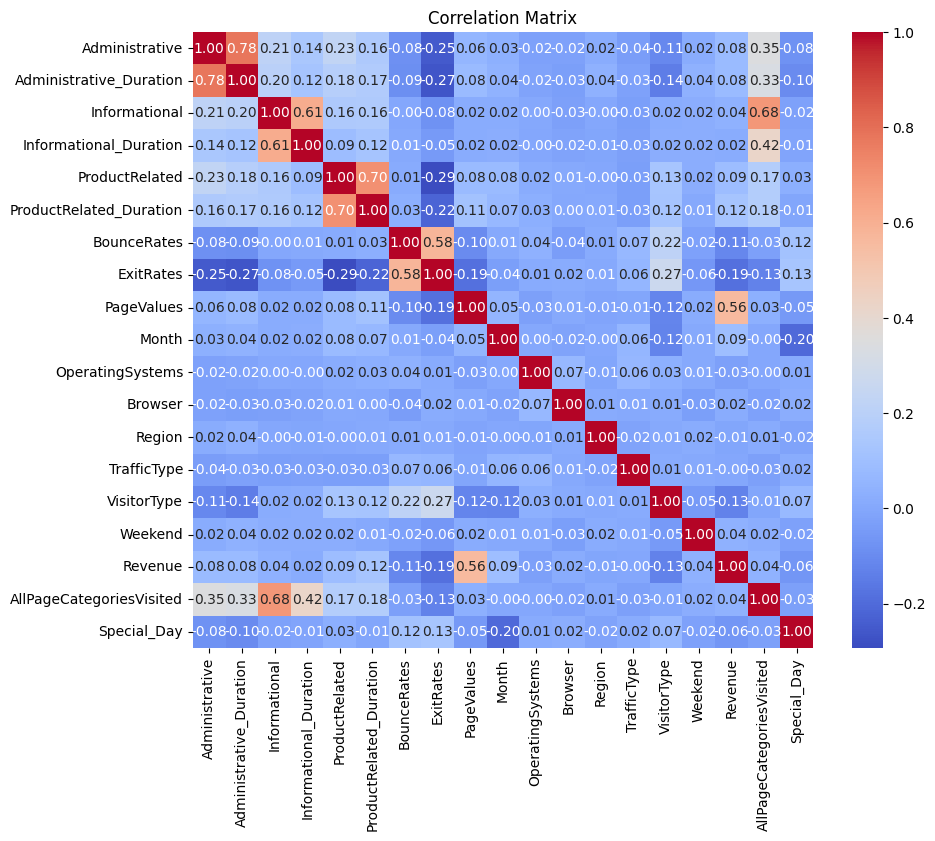

In [108]:
# Heatmap visualization to identify relationships and multicollinearity.
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

**Administrative to Administrative_Duration:**

Strong positive correlation (0.78).
Indicates that as the number of administrative pages visited increases, the duration spent on administrative pages also tends to increase significantly. This suggests users engage more deeply with administrative content.

**Informational to Informational_Duration:**

Moderate positive correlation (0.61).
Sessions with more informational page views tend to have longer durations spent on informational pages. This emphasizes the importance of engaging informational content for users.

**ProductRelated to ProductRelated_Duration:**

Moderate positive correlation (0.70).
Sessions with more product-related page views are associated with longer durations spent on product-related pages. This highlights the interest users have in product details and the potential for extended engagement.

**PageValues to Revenue:**

Positive correlation (0.56).
Higher page values correlate positively with revenue generation. Focusing on pages with higher values can potentially enhance revenue by catering to user preferences and behaviors.

**AllPageCategoriesVisited to Revenue:**

Positive correlation (0.44).
Sessions where users visit all page categories (administrative, informational, product-related) tend to lead to higher revenue. This underscores the importance of comprehensive user engagement across different page categories.

**VisitorType to Revenue:**

Negative correlation (-0.13).
The type of visitor (returning or new) has a slight negative impact on revenue. Strategies focusing on improving conversion rates for new visitors could potentially increase overall revenue.

**Class Distribution**



In [109]:
# Target Variable ('Revenue'): Distribution analysis to understand class balance
target_distribution = df['Revenue'].value_counts()
print(target_distribution)

Revenue
0    6355
1    1151
Name: count, dtype: int64


Imbalance in Target variable using SMOTE to generate synthetic nodes to balance the Target variable


In [110]:
# Addressing class imbalances if necessary.
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X = df.drop('Revenue', axis=1)
y = df['Revenue']
X_resampled, y_resampled = smote.fit_resample(X, y)
print(y_resampled.value_counts())

Revenue
0    6355
1    6355
Name: count, dtype: int64


**Key Metrics Summary**



In [111]:
# Page Views and Durations: Summary of page category interactions (Administrative, Informational, ProductRelated).
page_views = df[['Administrative', 'Informational', 'ProductRelated']].sum()
print(page_views)

Administrative     12116
Informational       2512
ProductRelated    152998
dtype: int64


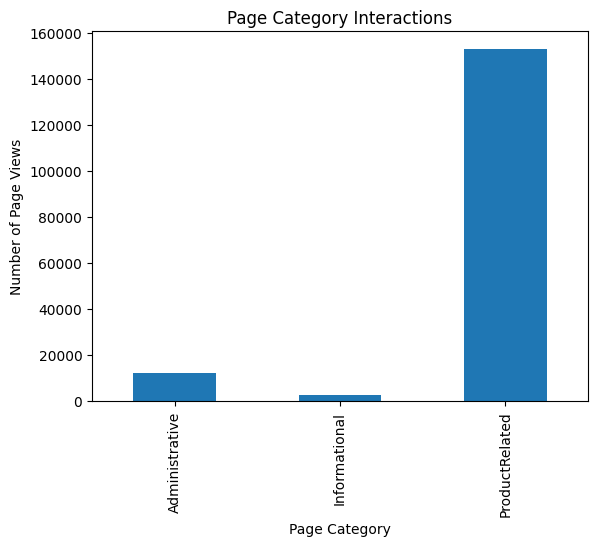

In [112]:
# Plot summary
page_views.plot(kind='bar')
plt.title('Page Category Interactions')
plt.xlabel('Page Category')
plt.ylabel('Number of Page Views')
plt.show()

This disparity suggests that users primarily engage heavily with product-related pages compared to administrative and informational pages, emphasizing the importance of optimizing user experience and content relevance in product-related sections to maximize engagement and conversions.





In [113]:
# Bounce and Exit Rates: Average rates for each page category to identify high drop-off points.
bounce_rates_A = df.groupby('Administrative')['BounceRates'].mean()
exit_rates_A = df.groupby('Administrative')['ExitRates'].mean()
print(bounce_rates_A)
print(exit_rates_A)

Administrative
0     0.008859
1     0.006732
2     0.006869
3     0.006067
4     0.006057
5     0.006696
6     0.005747
7     0.005404
8     0.006698
9     0.005952
10    0.005959
Name: BounceRates, dtype: float64
Administrative
0     0.034579
1     0.024555
2     0.025261
3     0.023132
4     0.022414
5     0.021427
6     0.019741
7     0.019773
8     0.021580
9     0.019041
10    0.019694
Name: ExitRates, dtype: float64


In [114]:
bounce_rates_I = df.groupby('Informational')['BounceRates'].mean()
exit_rates_I = df.groupby('Informational')['ExitRates'].mean()
print(bounce_rates_I)
print(exit_rates_I)

Informational
0     0.007603
1     0.008218
2     0.007095
3     0.007601
4     0.007333
5     0.007220
6     0.006822
7     0.012033
8     0.013539
9     0.008347
10    0.005032
16    0.003175
Name: BounceRates, dtype: float64
Informational
0     0.029554
1     0.025299
2     0.025201
3     0.025839
4     0.022978
5     0.023445
6     0.021406
7     0.024114
8     0.019332
9     0.015570
10    0.021982
16    0.012764
Name: ExitRates, dtype: float64


In [115]:
bounce_rates_P = df.groupby('ProductRelated')['BounceRates'].mean()
exit_rates_P = df.groupby('ProductRelated')['ExitRates'].mean()
print(bounce_rates_P)
print(exit_rates_P)

ProductRelated
0     0.000000
1     0.001724
2     0.002154
3     0.002410
4     0.006396
        ...   
68    0.004166
69    0.006325
70    0.006347
71    0.005847
72    0.006577
Name: BounceRates, Length: 73, dtype: float64
ProductRelated
0     0.052991
1     0.038776
2     0.043618
3     0.048843
4     0.042866
        ...   
68    0.016077
69    0.022403
70    0.016857
71    0.018763
72    0.021394
Name: ExitRates, Length: 73, dtype: float64


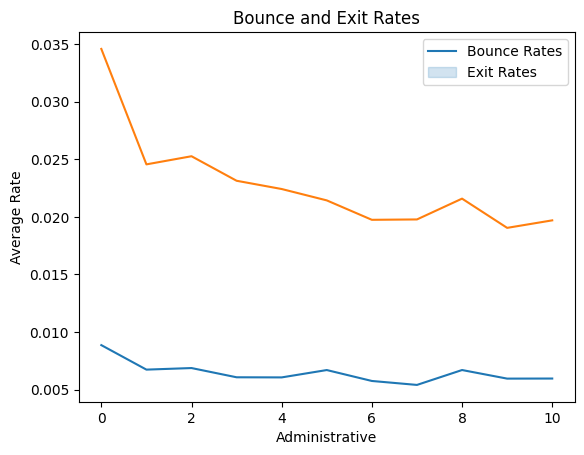

In [116]:
# plot (Administrative, Informational, ProductRelated) bounce rates and exit rates mean
sns.lineplot(x=bounce_rates_A.index, y=bounce_rates_A.values)
sns.lineplot(x=exit_rates_A.index, y=exit_rates_A.values)

plt.title('Bounce and Exit Rates')
plt.xlabel('Administrative')
plt.ylabel('Average Rate')
plt.legend(['Bounce Rates', 'Exit Rates'])
plt.show()

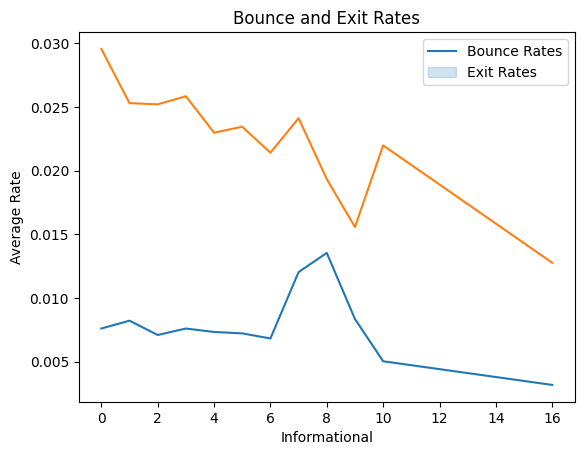

In [117]:
sns.lineplot(x=bounce_rates_I.index, y=bounce_rates_I.values)
sns.lineplot(x=exit_rates_I.index, y=exit_rates_I.values)

plt.title('Bounce and Exit Rates')
plt.xlabel('Informational')
plt.ylabel('Average Rate')
plt.legend(['Bounce Rates', 'Exit Rates'])
plt.show()

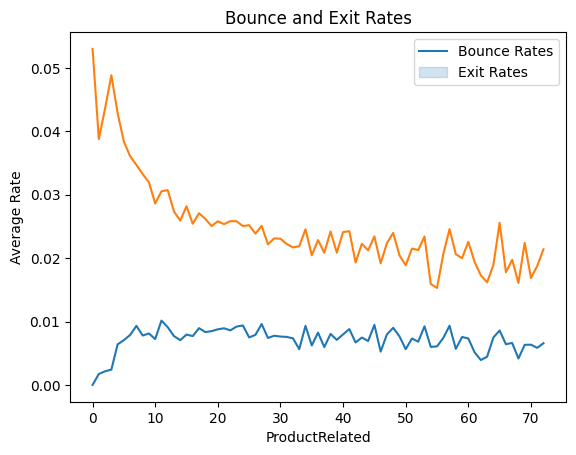

In [118]:
sns.lineplot(x=bounce_rates_P.index, y=bounce_rates_P.values)
sns.lineplot(x=exit_rates_P.index, y=exit_rates_P.values)

plt.title('Bounce and Exit Rates')
plt.xlabel('ProductRelated')
plt.ylabel('Average Rate')
plt.legend(['Bounce Rates', 'Exit Rates'])
plt.show()

**Administrative Page Category:**

Bounce Rates: Generally low, ranging from approximately 0.5% to 0.9%, indicating a relatively low percentage of single-page visits.

Exit Rates: Also low, ranging from about 1.9% to 3.5%, suggesting users exit administrative pages less frequently compared to other page categories.

**Informational Page Category:**

Bounce Rates: Varying from 0.3% to 1.3%, with occasional spikes observed (e.g., 16th entry).

Exit Rates: Generally moderate, ranging from approximately 1.3% to 3.0%, indicating some variability in how users navigate away from informational pages.

**ProductRelated Page Category:**

Bounce Rates: Start from 0% and increase gradually up to around 0.7% for higher-numbered entries, suggesting a mix of immediate engagement and quick exits.

Exit Rates: Range from 1.6% to 5.3%, with fluctuations across different entries, indicating varying levels of user retention and engagement depth.

**Interpretation Highlights:**

User Engagement: Product-related pages show varied engagement, with generally low bounce rates but higher exit rates compared to administrative and informational pages.

Content Relevance: Lower bounce rates across all categories suggest that visitors find content relevant, but the higher exit rates in ProductRelated categories may indicate the need for optimization to retain user interest.

Behavior Insights: Understanding these rates helps in tailoring strategies to improve user retention and enhance overall website usability, particularly in guiding users from product exploration to conversion.

**Special Day Analysis**

**Distribution Analysis:**


In [119]:
# Distribution Analysis:Exploration of the SpecialDay feature and its impact on user behavior.
special_day_distribution = df['Special_Day'].value_counts()
print(special_day_distribution)

Special_Day
0    7015
1     491
Name: count, dtype: int64


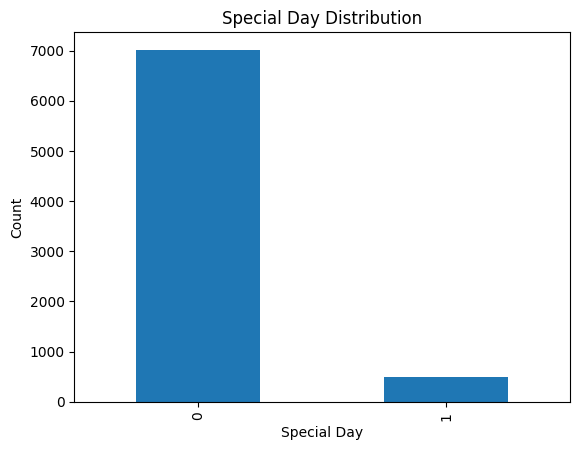

In [120]:
# Plot special_day_distribution
special_day_distribution.plot(kind='bar')
plt.title('Special Day Distribution')
plt.xlabel('Special Day')
plt.ylabel('Count')
plt.show()

In [121]:
# Correlation with Revenue:Analysis of how special days influence revenue generation.

special_day_revenue = df.groupby('Special_Day')['Revenue'].mean()
print(special_day_revenue)

Special_Day
0    0.159230
1    0.069246
Name: Revenue, dtype: float64


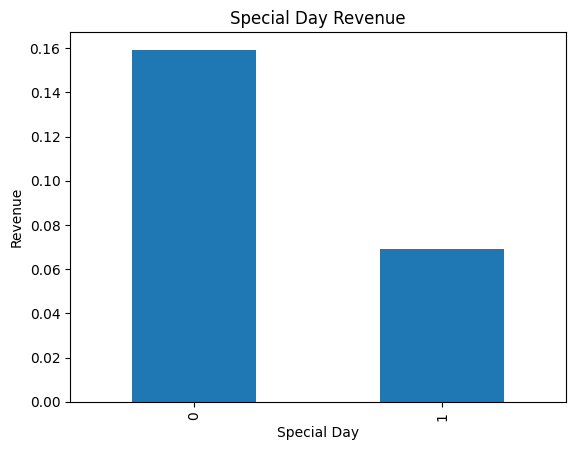

In [122]:
# Plot special_day_revenue

special_day_revenue.plot(kind='bar')
plt.title('Special Day Revenue')
plt.xlabel('Special Day')
plt.ylabel('Revenue')
plt.show()


This suggests that there is a notable decrease in average revenue on special days compared to regular days.

**Brief Interpretation:**
Revenue Impact: Special days appear to have a negative impact on average revenue generation, as indicated by the lower average revenue when Special_Day is 1 compared to when it is 0.

Strategic Considerations: Businesses should strategize around special days to potentially mitigate this revenue dip, possibly through targeted marketing campaigns, special offers, or promotions to boost sales during these periods.

**Feature Engineering Insights**



In [123]:
# Insight into whether users visited all three page categories. AllPageCategoryVisited
df['AllPageCategoriesVisited'] = df['AllPageCategoriesVisited'].astype(int)
df['AllPageCategoriesVisited'].value_counts()

AllPageCategoriesVisited
0    6697
1     809
Name: count, dtype: int64

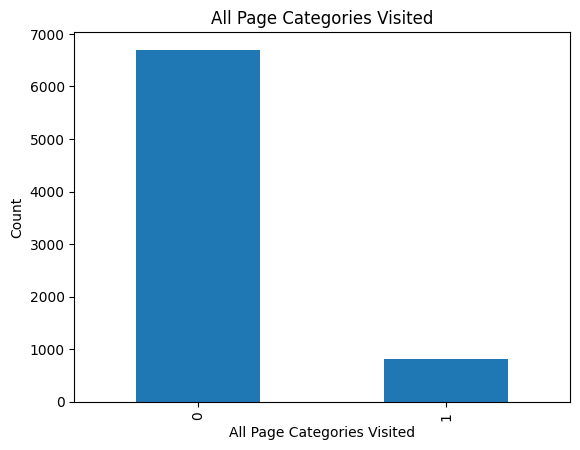

In [124]:
# Plot AllPageCategoryVisited
df['AllPageCategoriesVisited'].value_counts().plot(kind='bar')
plt.title('All Page Categories Visited')
plt.xlabel('All Page Categories Visited')
plt.ylabel('Count')
plt.show()

This reveals that a substantial number of users did not explore all page categories, indicating potential opportunities to improve engagement and navigation across different sections of the website.

In [125]:
(df['Administrative_Duration'] > 0) & (df['Informational_Duration'] > 0) & (df['ProductRelated_Duration'] > 0)

4        False
5        False
9        False
10       False
11       False
         ...  
12324    False
12325    False
12326    False
12328    False
12329    False
Length: 7506, dtype: bool

In [126]:
# Create flag if Adminstrative and Informational page visited
df['Administrative_Informational'] = (df['Administrative_Duration'] > 0) & (df['Informational_Duration'] > 0)
df['Administrative_Informational'] = df['Administrative_Informational'].astype(int)
df['Administrative_Informational'] = df['Administrative_Informational'].apply(lambda x: 1 if x > 0 else 0)
df['Administrative_Informational'].value_counts()

Administrative_Informational
0    6696
1     810
Name: count, dtype: int64

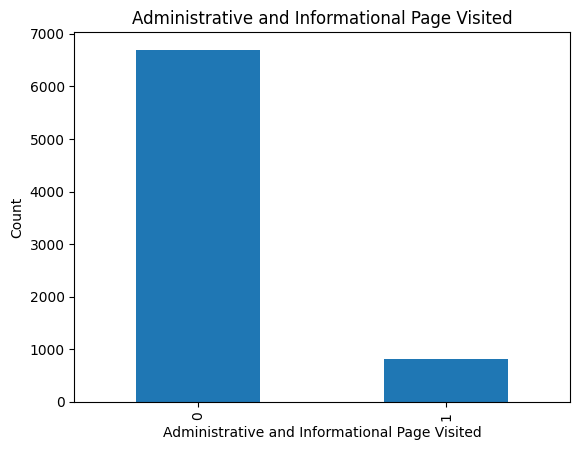

In [127]:
# Plot Administrative_Informational
df['Administrative_Informational'].value_counts().plot(kind='bar')
plt.title('Administrative and Informational Page Visited')
plt.xlabel('Administrative and Informational Page Visited')
plt.ylabel('Count')
plt.show()

This indicates that a significant number of users did not interact with both Administrative and Informational pages concurrently, suggesting potential areas for improving cross-category navigation and user engagement strategies.





In [128]:
# Create flag if Adminstrative and ProductRelated page visited
df['Administrative_ProductRelated'] = (df['Administrative_Duration'] > 0) & (df['ProductRelated_Duration'] > 0)
df['Administrative_ProductRelated'] = df['Administrative_ProductRelated'].astype(int)
df['Administrative_ProductRelated'] = df['Administrative_ProductRelated'].apply(lambda x: 1 if x > 0 else 0)
df['Administrative_ProductRelated'].value_counts()

Administrative_ProductRelated
0    3768
1    3738
Name: count, dtype: int64

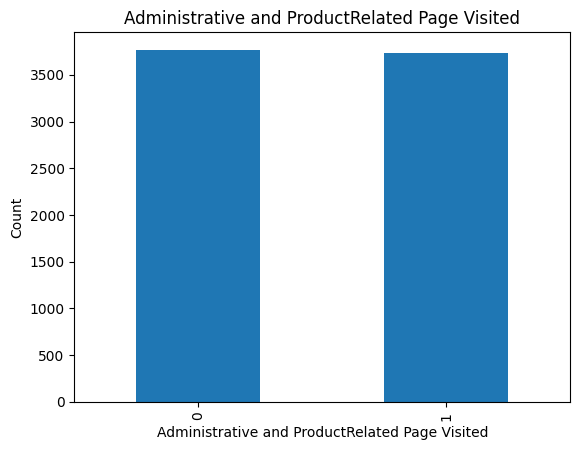

In [129]:
# Plot Administrative_ProductRelated
df['Administrative_ProductRelated'].value_counts().plot(kind='bar')
plt.title('Administrative and ProductRelated Page Visited')
plt.xlabel('Administrative and ProductRelated Page Visited')
plt.ylabel('Count')
plt.show()

This indicates a nearly equal split in user behavior between those who engaged with Administrative pages alone and those who engaged with both Administrative and ProductRelated pages. It suggests opportunities to understand and potentially influence user navigation patterns between different page categories on the website.

In [130]:
# Create flag if Informational and ProductRelated page visited
df['Informational_ProductRelated'] = (df['Informational_Duration'] > 0) & (df['ProductRelated_Duration'] > 0)
df['Informational_ProductRelated'] = df['Informational_ProductRelated'].apply(lambda x: 1 if x > 0 else 0)
df['Informational_ProductRelated'].value_counts()

Informational_ProductRelated
0    6411
1    1095
Name: count, dtype: int64

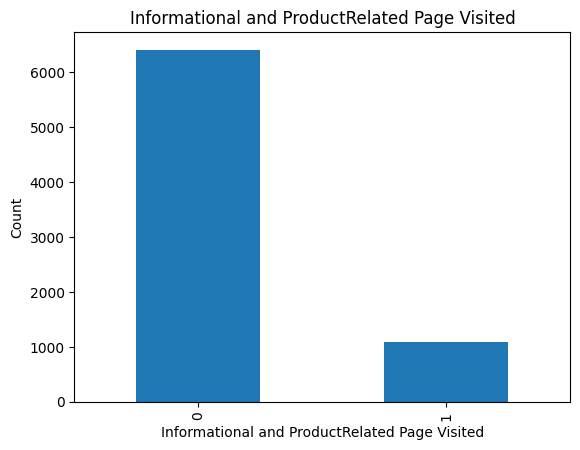

In [131]:
# Plot Informational_ProductRelated
df['Informational_ProductRelated'].value_counts().plot(kind='bar')
plt.title('Informational and ProductRelated Page Visited')
plt.xlabel('Informational and ProductRelated Page Visited')
plt.ylabel('Count')
plt.show()

 This highlights potential opportunities to enhance user navigation and encourage more comprehensive exploration of related content categories on the website to improve overall engagement and user experience.






Exploratory Data Analysis (EDA)

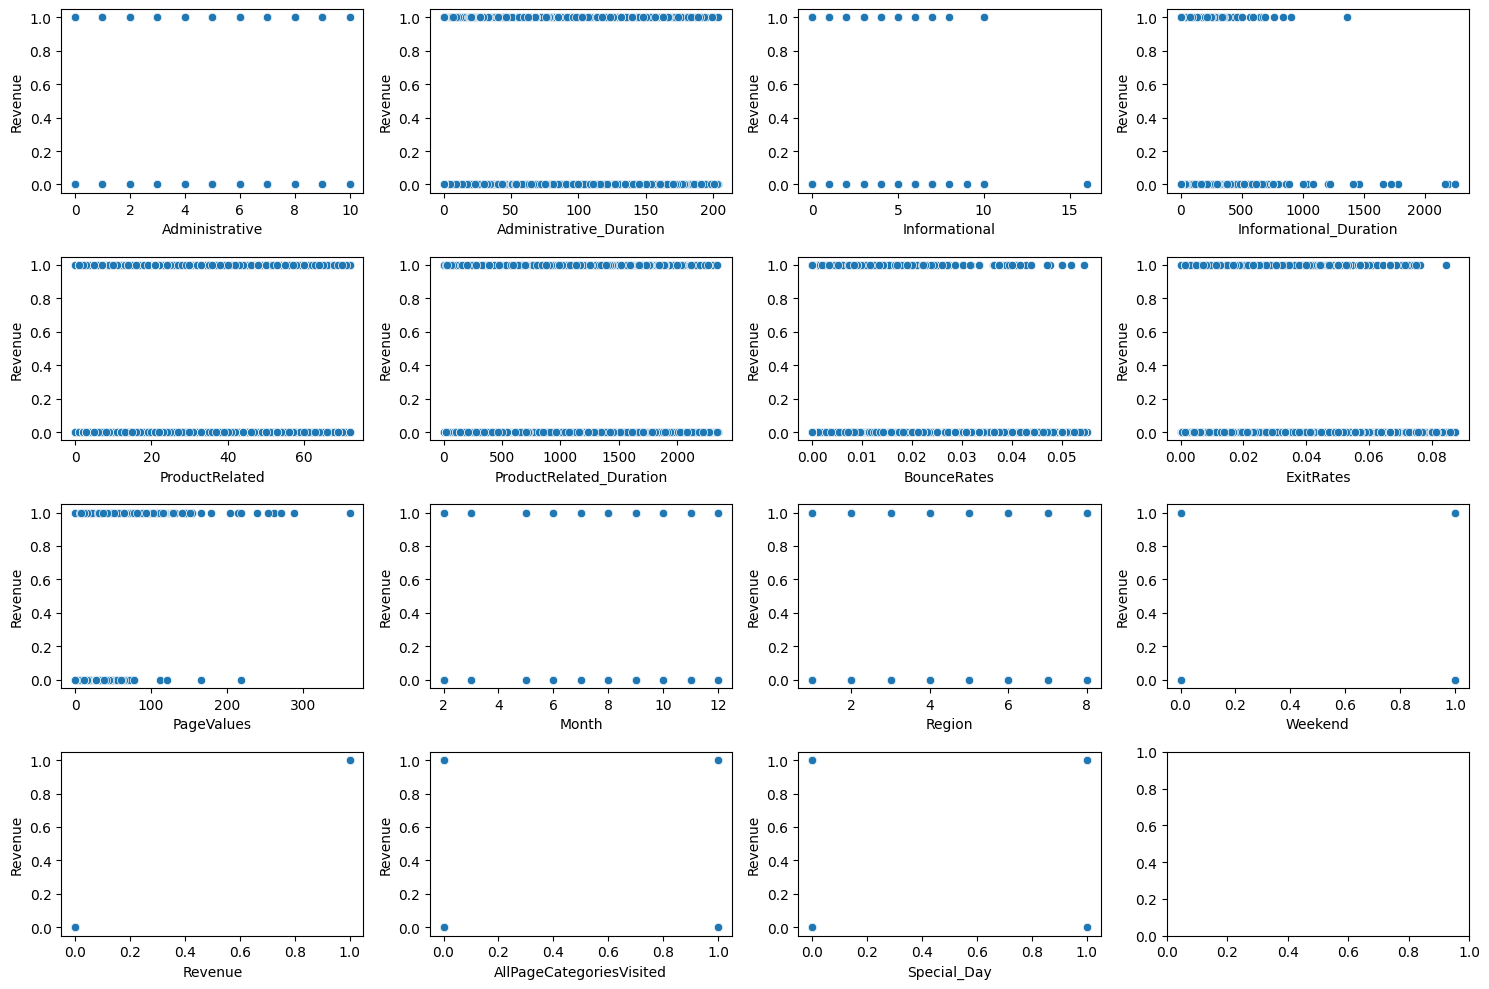

In [132]:
# Visual Relationships:Scatter plots, pair plots, and heatmaps to visualize key feature relationships.

fig,ax=plt.subplots(4,4,figsize=(15,10))
for i,col in enumerate(num_cols):
    sns.scatterplot(x=df[col],y=df['Revenue'],ax=ax[i//4,i%4])

plt.tight_layout()
plt.show()

In [133]:
df.groupby('TrafficType')['PageValues'].mean()

TrafficType
1      3.493618
2      8.371100
3      3.570885
4      7.797040
5      8.151167
6      5.134937
7     16.075562
8      9.327795
9      5.351495
10     5.643183
11     5.911793
12     0.000000
13     2.460742
14     1.907844
15     0.000000
16     0.000000
17     0.000000
18     0.000000
19     4.335296
20     8.306468
Name: PageValues, dtype: float64

<Axes: xlabel='TrafficType'>

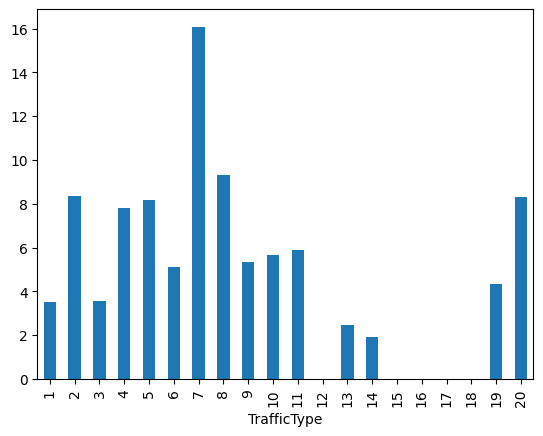

In [134]:
# PageValues Analysis: Plot Distribution and relationship with Traffic Type, Visitor Type, and Region.
df.groupby('TrafficType')['PageValues'].mean().plot(kind='bar')

TrafficType 7 has the highest average with 16.08 pages viewed, suggesting that users arriving from this source tend to explore more pages per session. Conversely, TrafficType 12, 15, 16, 17, and 18 have an average of 0 pages viewed, indicating either no data or extremely low engagement from these traffic types.

In [135]:
df.groupby('VisitorType')['PageValues'].mean()

VisitorType
0    10.899415
1     5.086488
2     2.092591
Name: PageValues, dtype: float64

<Axes: xlabel='VisitorType'>

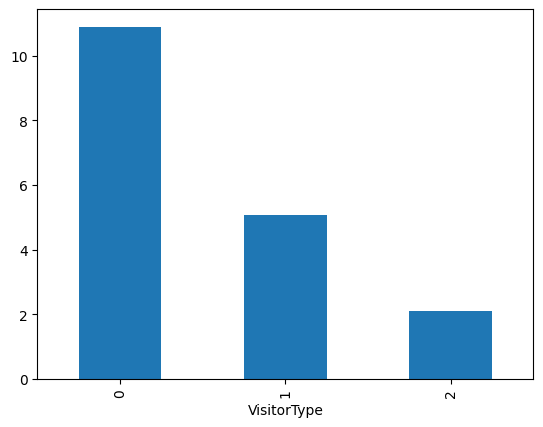

In [136]:
df.groupby('VisitorType')['PageValues'].mean().plot(kind='bar')

This suggests that returning visitors are more likely to explore multiple pages during their visit compared to new visitors and others, indicating potentially higher engagement and familiarity with the website's content among returning users.





In [137]:
df.groupby('Region')['PageValues'].mean()

Region
1     6.399185
2     5.918230
3     5.405489
4     6.656726
5    11.446252
6     5.206832
7     5.823936
8     3.791351
Name: PageValues, dtype: float64

<Axes: xlabel='Region'>

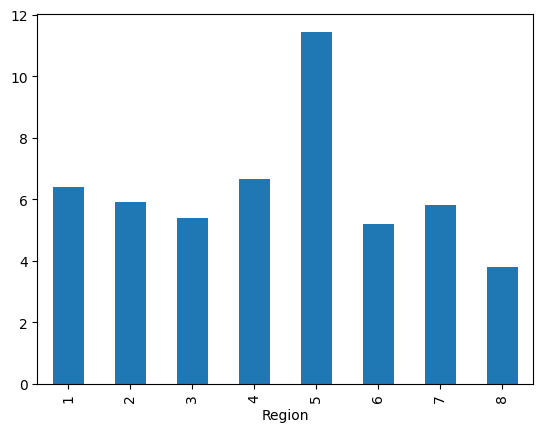

In [138]:
df.groupby('Region')['PageValues'].mean().plot(kind='bar')

The data indicates the average number of pages viewed per session varies across different regions. Region 5 stands out with the highest average of 11.45 pages viewed per session, suggesting visitors from this region tend to explore more pages during their visits. On the other hand, Region 8 has the lowest average of 3.79 pages viewed per session, indicating lower engagement in terms of page views compared to other regions. Regions 1, 2, 3, 4, 6, and 7 show moderate average page views per session ranging from approximately 5 to 7 pages, reflecting varying levels of engagement across these regions.

In [139]:
# Session Lengths Addition of duration on pages
df['SessionLength'] = df['Administrative_Duration'] + df['Informational_Duration'] + df['ProductRelated_Duration']

In [140]:
df.groupby('Revenue')['SessionLength'].mean()

Revenue
0    707.988288
1    917.045630
Name: SessionLength, dtype: float64

<Axes: xlabel='Revenue'>

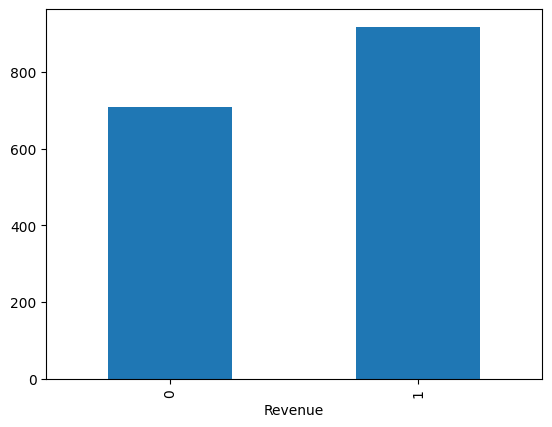

In [141]:
# Session Lengths:Impact analysis on conversion rates.
df.groupby('Revenue')['SessionLength'].mean().plot(kind='bar')

On average, sessions that result in revenue (Revenue 1) have a longer duration of approximately 917 seconds compared to sessions with no revenue (Revenue 0), which have an average duration of approximately 708 seconds. This suggests that visitors who ultimately generate revenue tend to spend more time on the website, possibly indicating higher engagement, deeper exploration of content, and more interaction with the site's offerings before making a purchase.

In [142]:
df.groupby('Revenue')['SessionLength'].median()

Revenue
0    535.19
1    810.08
Name: SessionLength, dtype: float64

<Axes: xlabel='Revenue'>

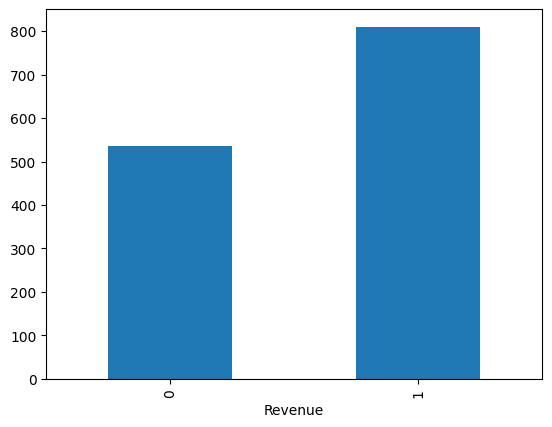

In [143]:
df.groupby('Revenue')['SessionLength'].median().plot(kind='bar')

This suggests that visitors who make purchases or generate revenue tend to spend a longer time on the website per session. This could indicate greater engagement, more thorough exploration of products or services, or a higher likelihood of completing transactions during their visits.

<Axes: xlabel='Revenue'>

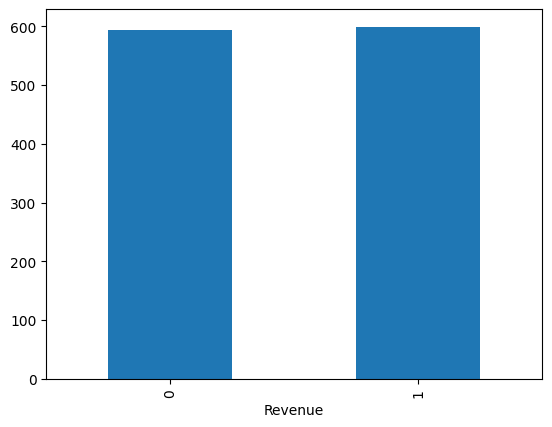

In [144]:
df.groupby('Revenue')['SessionLength'].std().plot(kind='bar')

**Behavior and Conversion Rate Analysis**



In [145]:
df.groupby(['TrafficType'])['Revenue'].mean()

TrafficType
1     0.105376
2     0.197605
3     0.095082
4     0.173103
5     0.256983
6     0.127341
7     0.290323
8     0.237885
9     0.111111
10    0.157706
11    0.200000
12    0.000000
13    0.046154
14    0.090909
15    0.000000
16    0.000000
17    0.000000
18    0.000000
19    0.076923
20    0.275000
Name: Revenue, dtype: float64

<Axes: xlabel='TrafficType'>

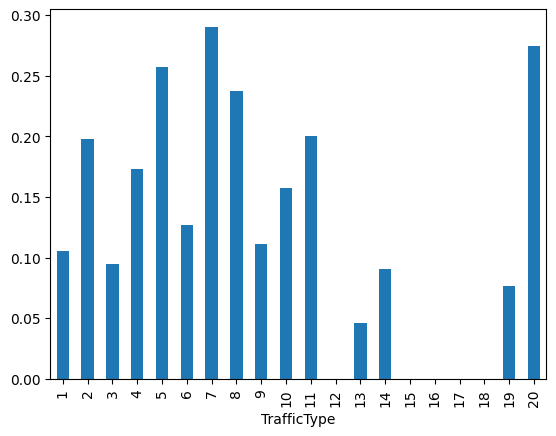

In [146]:
# User Grouping: Analysis of user behavior based on Traffic Type, Visitor Type, and Region.
df.groupby(['TrafficType'])['Revenue'].mean().plot(kind='bar')

In [147]:
df.groupby(['VisitorType'])['Revenue'].mean()

VisitorType
0    0.252094
1    0.132729
2    0.000000
Name: Revenue, dtype: float64

<Axes: xlabel='VisitorType'>

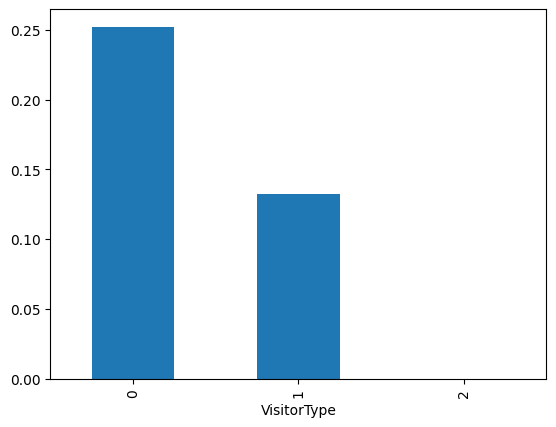

In [148]:
df.groupby(['VisitorType'])['Revenue'].mean().plot(kind='bar')

In [149]:
df.groupby(['Region'])['Revenue'].mean()

Region
1    0.155667
2    0.167127
3    0.140162
4    0.151715
5    0.189320
6    0.154696
7    0.157480
8    0.130742
Name: Revenue, dtype: float64

<Axes: xlabel='Region'>

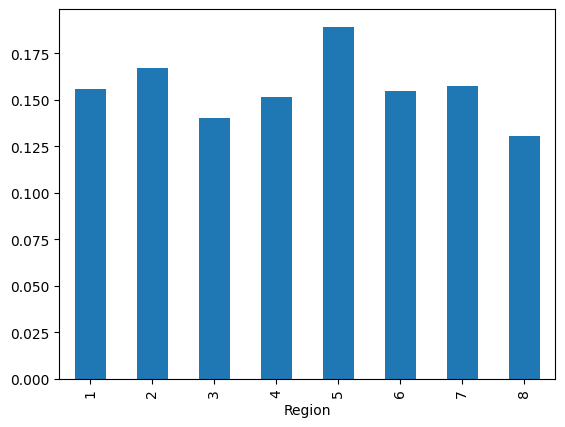

In [150]:
df.groupby(['Region'])['Revenue'].mean().plot(kind='bar')

**TrafficType vs Revenue:**

TrafficType 7 has the highest revenue conversion rate at 29.03%, followed by TrafficType 5 at 25.70%.
TrafficType 1 and TrafficType 3 also show relatively higher conversion rates compared to others.

**VisitorType vs Revenue:**

Returning visitors (VisitorType 0) have a significantly higher revenue conversion rate at 25.21% compared to new visitors (VisitorType 1) at 13.27%.
Visitors categorized as "Other" (VisitorType 2) did not result in any recorded revenue in the dataset.
Region vs Revenue:

Regions 5 and 2 have relatively higher revenue conversion rates at 18.93% and 16.71% respectively.
Regions 1, 3, 4, 6, and 7 also show moderate revenue conversion rates ranging from 13.07% to 15.75%.

**Interpretation Highlights:**

TrafficType 7 and TrafficType 5 are particularly effective channels for revenue generation, suggesting they may attract more engaged or qualified visitors.
Returning visitors (VisitorType 0) show a much higher propensity to convert into revenue compared to new visitors (VisitorType 1).
Regions 5 and 2 stand out as regions where visitors are more likely to convert into revenue, indicating potential geographical preferences or market dynamics.

These highlights suggest that focusing on TrafficType 7, optimizing strategies for returning visitors, and targeting regions 5 and 2 could potentially enhance revenue generation efforts on the e-commerce platform.

In [60]:
# Conversion Funnel Analysis: Steps leading to conversion and identification of potential barriers.
# Create line graph going from Administrative page users to informational page users to ProductRelated page user
a=pd.DataFrame(df.groupby(['Administrative'])['Revenue'].mean()).T
b=pd.DataFrame(df.groupby(['Informational'])['Revenue'].mean()).T
c=pd.DataFrame(df.groupby(['ProductRelated'])['Revenue'].mean()).T

In [61]:
# Rename Row 1 as Administrative, 2 as Informational and 3 as ProductRelated and plot 3 rows
d=pd.DataFrame(pd.concat([a,b,c]).T)
d.columns=['Administrative','Informational','ProductRelated']

In [62]:
# Delete rows with nulll values
d.dropna(inplace=True)


In [151]:
d

,Administrative,Informational,ProductRelated,Average
0,0.110536,0.144496,0.461538,0.238857
1,0.223425,0.204991,0.344828,0.257748
2,0.169903,0.194595,0.118519,0.161005
3,0.169014,0.202703,0.076364,0.149360
4,0.198745,0.225352,0.058608,0.160902
5,0.203175,0.135135,0.056391,0.131567
6,0.248756,0.086957,0.067568,0.134427
7,0.158228,0.200000,0.108553,0.155593
8,0.218182,0.500000,0.135231,0.284471
9,0.171875,0.000000,0.118577,0.096817


<Axes: >

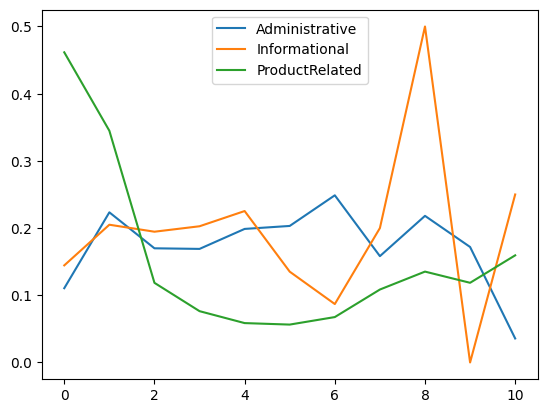

In [63]:
# Plot d
d.plot(kind='line')

In [64]:
# find average of all three values and find the max avg value row number
def avg(a,b,c):
  return (a+b+c)/3

d['Average']=d.apply(lambda x: avg(x['Administrative'],x['Informational'],x['ProductRelated']),axis=1)
d['Average'].idxmax()

8

In [65]:
d['Average'].idxmin()

9

**Administrative, Informational, ProductRelated Columns:**

Administrative: The highest average revenue conversion rate is observed in group 6 (24.88%), followed by group 1 (22.34%).

Informational: Group 1 has the highest revenue conversion rate (20.50%), followed by group 8 (50%).

ProductRelated: Group 1 also leads in revenue conversion rate here (34.48%), followed by group 8 (13.52%).

**Overall Average (Average Column):**

The average revenue conversion across all groups is provided in the "Average" column.
Group 8 shows the highest average revenue conversion rate at 28.45%, likely driven by high conversion rates in both Informational and ProductRelated categories.

**General Trends:**

Groups with higher engagement across Administrative, Informational, and ProductRelated pages tend to have higher revenue conversion rates.
There is variability across groups, indicating different levels of effectiveness in converting visits into revenue.

Group 9 stands out with a relatively low overall average (9.68%), likely due to a significant proportion of sessions where Informational pages were not visited.
These interpretations suggest that focusing on groups with higher engagement across all page categories (especially Informational and ProductRelated) could potentially lead to higher revenue generation. Groups like 1 and 8 consistently show higher revenue conversion rates across different page categories, indicating these segments may be more receptive to completing purchases or conversions on the e-commerce platform.

In [74]:
# Average exitrates at each category page
df[df['Administrative']>0]['ExitRates'].mean()


0.02328284540203496

In [75]:
df[df['Informational']>0]['ExitRates'].mean()

0.025015855831570386

In [76]:
df[df['ProductRelated']>0]['ExitRates'].mean()

0.02876872236487388

The differences in exit rates across Administrative, Informational, and ProductRelated pages highlight varying levels of user engagement and potential conversion barriers.

Lower exit rates (like Administrative) generally indicate stronger engagement or less interruption in the user journey.

Higher exit rates (like ProductRelated) may indicate areas where optimizations in content, user experience, or calls to action could potentially reduce drop-offs and improve overall conversion rates on the website.

# Findings:

**Page Category Exit Rates:**

Administrative Page: Exit rate of 2.3% indicates it serves well as an initial engagement point with low drop-offs.
Informational Page: Exit rate of 2.5% suggests moderate engagement but potential room for improvement in retaining users.
ProductRelated Page: Highest exit rate at 2.8% indicates significant user drop-offs, possibly due to less engaging content or navigation issues.

**Visitor Type and Revenue:**

Returning visitors contribute significantly higher revenue compared to new visitors and others, highlighting the importance of loyalty programs and personalized experiences.

**Traffic Source and Revenue:**

Traffic from certain sources (e.g., TrafficType 7, 20) correlates with higher revenue, suggesting targeted campaigns or optimizations for these channels could yield better returns.

**Region and Page Views:**

Regions vary in average page views, with Region 5 showing notably higher engagement. Targeted regional campaigns or localized content could capitalize on these insights.

**Special Days and Revenue:**

Users visiting during special days show higher average revenue, indicating potential for targeted promotions or special offers during peak periods.
# Recommendations:

**Optimize ProductRelated Pages:**

Improve content relevance and navigation on ProductRelated pages to reduce the exit rate. Enhance product recommendations, user reviews, and interactive elements to keep users engaged.

**Enhance Informational Pages:**

Increase engagement on Informational pages by enriching content with multimedia, FAQs, or links to related product pages. Implement clear calls to action to guide users deeper into the site.

**Personalize User Experience:**

Leverage visitor type data to tailor content and promotions. Implement personalized recommendations, email campaigns, and loyalty rewards to enhance retention and increase conversion rates.

**Segmented Marketing Strategies:**

Focus marketing efforts on high-performing traffic sources identified (e.g., TrafficType 7, 20). Allocate resources for targeted campaigns that resonate with these segments to maximize ROI.

**Regional Targeting:**

Develop region-specific content or offers based on engagement insights from different regions. Use analytics to understand local preferences and behaviors for better conversion optimization.

**Special Day Campaigns:**

Plan and execute special promotions or events during peak special days to capitalize on higher revenue opportunities. Use data from past special day performances to refine strategies.

Implementing these recommendations can help optimize user engagement, reduce exit rates, and ultimately improve conversion rates and revenue generation on the e-commerce website.